/tmp/ipykernel_1485907/2794829085.py:33: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  v = sp.real(V[:, i].reshape(nx, ny))


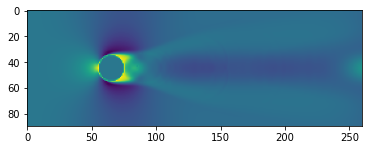

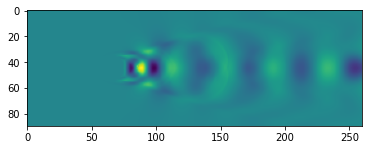

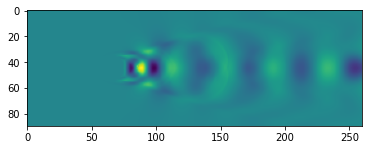

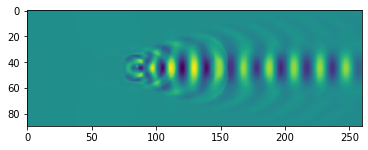

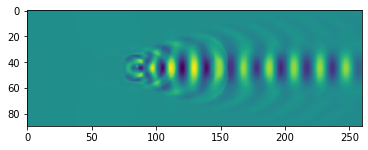

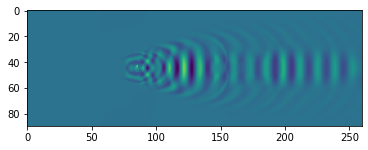

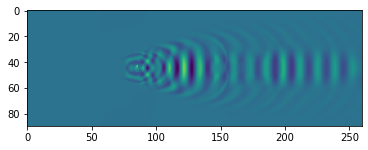

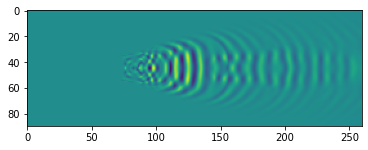

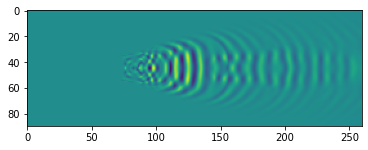

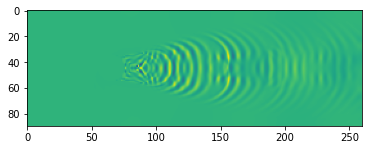

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import algorithms

plt.ion()

# the data was generated by the Python code available at http://wiki.palabos.org/numerics:codes

#%% load variables from mat file into main scope
data = scipy.io.loadmat('data/vonKarman.mat', squeeze_me=True)
for s in data.keys():
    if s[:2] == '__' and s[-2:] == '__': continue
    exec('%s = data["%s"]' % (s, s))

#%% apply DMD
nx, ny, m = x.shape
x = x.reshape([nx*ny, m])
X = x[:, :-1]
Y = x[:, 1:]

d, V = algorithms.dmd(X, Y)

#%% plot DMD modes
for i in range(10):
    plt.figure()
    v = sp.real(V[:, i].reshape(nx, ny))
    plt.imshow(v)
plt.show()